In [1]:
import pandas as pd
import datetime as dt
pd.core.common.is_list_like = pd.api.types.is_list_like

# from pandas_datareader import data
import pandas_datareader.data as web


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2017, 5, 1)

## The `.plot() ` Method

In [3]:

f = web.DataReader('F', 'iex', start, end)
f.head()

5y


,open,high,low,close,volume
date,,,,,
2015-01-02,12.6005,12.6490,12.2715,12.4146,24777911
2015-01-05,12.2206,12.2287,11.8731,11.9297,44079745
2015-01-06,12.0266,12.0428,11.6225,11.8165,32981627
2015-01-07,11.9458,12.1964,11.9377,12.1560,26065329
2015-01-08,12.4469,12.5116,12.3095,12.4631,33943398


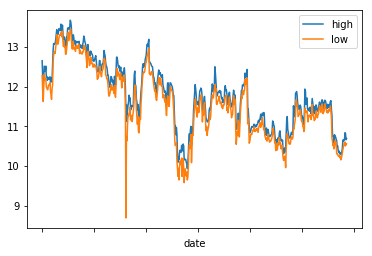

In [4]:
f[["high", "low"]].plot()

## Modifying Aesthetics

In [5]:
 f = web.DataReader('F', 'iex', start, end)
f.head(3)

5y


,open,high,low,close,volume
date,,,,,
2015-01-02,12.6005,12.6490,12.2715,12.4146,24777911
2015-01-05,12.2206,12.2287,11.8731,11.9297,44079745
2015-01-06,12.0266,12.0428,11.6225,11.8165,32981627


In [6]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

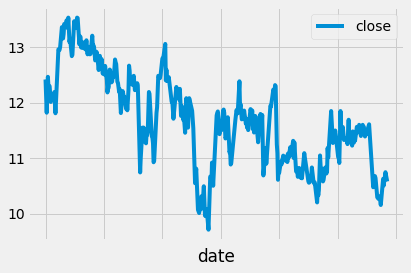

In [9]:
plt.style.use("fast")
# plt.style.use("fivethirtyeight")
f.plot(y = "close")

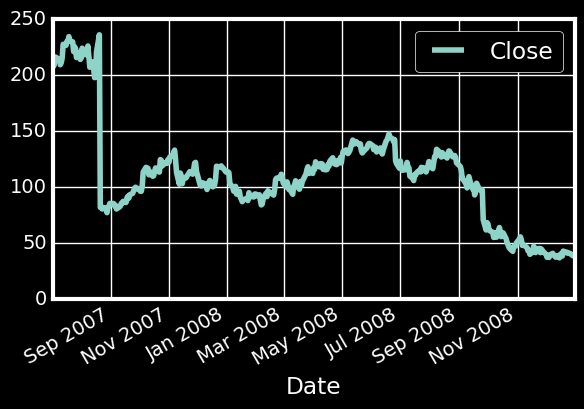

In [16]:
plt.style.use("dark_background")
bb.plot(y = "Close")

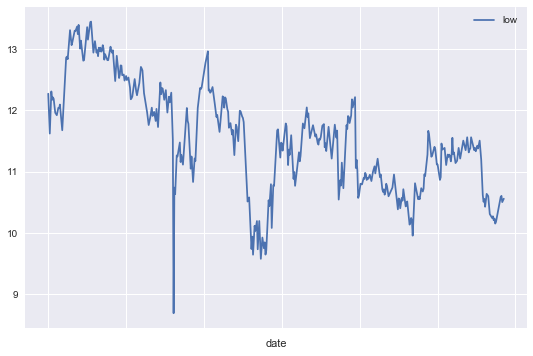

In [11]:
plt.style.use("seaborn")
f.plot(y = "low")

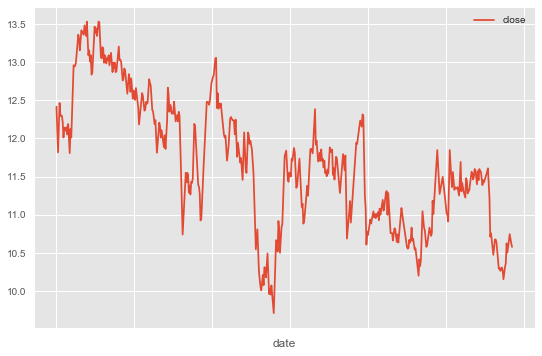

In [13]:
plt.style.use("ggplot")
f.plot(y = "close")

## Bar Charts

In [17]:
Robin = web.DataReader(name = "RH", data_source = "robinhood", start = "2004-01-01", end = "2016-12-31")
Robin.head(3)

close_price high_price  interpolated  low_price open_price  \
symbol begins_at                                                               
RH     2017-09-01   48.510000  48.700000         False  45.740000  46.670000   
       2017-09-05   49.740000  50.790000         False  47.500000  49.550000   
       2017-09-06   49.420000  51.120000         False  49.020000  49.860000   

                  session   volume  
symbol begins_at                    
RH     2017-09-01     reg  2056560  
       2017-09-05     reg  2618522  
       2017-09-06     reg  4895583

In [25]:
def rank_performance(close_price):
    if float(close_price) <= 40:
        return "Poor"
    elif float(close_price) > 40 and float(close_price) <= 55:
        return "Satisfactory"
    else:
        return "Stellar"

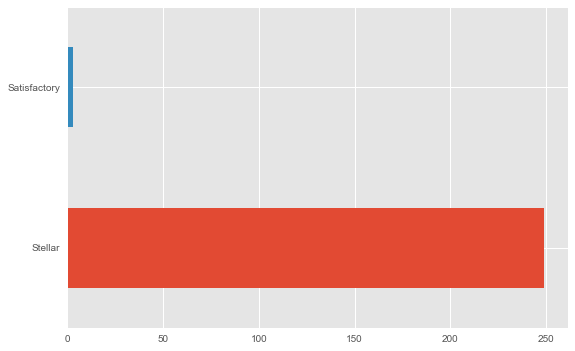

In [26]:
plt.style.use("ggplot")
Robin["close_price"].apply(rank_performance).value_counts().plot(kind = "barh")

## Pie Charts

In [30]:
apple = web.DataReader(name = "AAPL", data_source = "morningstar", start = "2012-01-01", end = "2016-12-31")
apple.head(3)

Close     High      Low     Open    Volume
Symbol Date                                                    
AAPL   2012-01-02  57.8571  57.8571  57.8571  57.8571         0
       2012-01-03  58.7471  58.9286  58.4286  58.5000  75564699
       2012-01-04  59.0629  59.2400  58.4686  58.6000  65061108

In [31]:
apple["Close"].mean()

93.30895877394642

In [32]:
def rank_performance(stock_price):
    if stock_price >= 92.63809405940599:
        return "Above Average"
    else:
        return "Below Average"

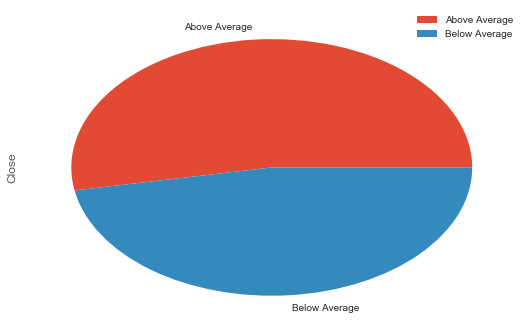

In [33]:
plt.style.use("ggplot")
apple["Close"].apply(rank_performance).value_counts().plot(kind = "pie", legend = True)

## Histograms

In [35]:
quandl = web.DataReader(name = "Q", data_source = "quandl", start = "2004-01-01", end = "2016-12-31")
quandl.head(3)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2016-12-30,75.89,76.210,75.51,76.05,848649.0,0.0,1.0,75.89,76.210,75.51,76.05,848649.0
2016-12-29,75.84,76.363,75.73,75.88,549524.0,0.0,1.0,75.84,76.363,75.73,75.88,549524.0
2016-12-28,76.24,76.300,75.81,75.96,807768.0,0.0,1.0,76.24,76.300,75.81,75.96,807768.0


In [36]:
def custom_round(stock_price):
    return int(stock_price / 100.0) * 100

In [38]:
quandl["High"].apply(custom_round).value_counts().sort_index()

0    920
Name: High, dtype: int64

In [40]:
quandl["High"].apply(custom_round).nunique()

1

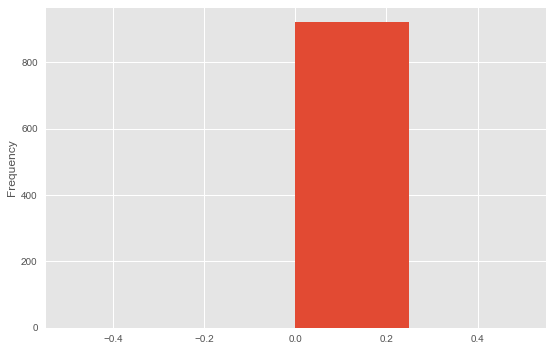

In [42]:
quandl["High"].apply(custom_round).plot(kind = "hist", bins = 4)